<a href="https://colab.research.google.com/github/mei-kei/image-stitcher-panorama/blob/main/basic_image_stitcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [ ]:
import cv2
import math
import glob
import matplotlib.pyplot as plt

**Load and Preprocess Images**

1. Get file paths
2. Load and convert images from BGR to RGB for correct colour display


In [ ]:
# using glob to grab all files in the specific folder
# alternative paths: 'images/scenery/*', 'images/support_center/*'
images_path = glob.glob("/content/drive/MyDrive/Colab Notebooks/images/library/*")
# sorting to ensure images are stitched in the correct order (lib-1, lib-2, etc.)
images_path.sort()

images = []
for file in images_path:
  # reading the image using OpenCV
    img = cv2.imread(file)

    # safety check since google drive can create hidden folders like '.ipynb_checkpoints'
    if img is None:
      print(f"Failed to load image from {file}")
      continue

  # converting from BGR to RGB for correct colour display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # adding the processed image to the list
    images.append(img)

# check how many images we loaded
num_images = len(images)
print(f"Successfully loaded {num_images} images.")

Successfully loaded 4 images.


**Visualise Input Data**

Since it is good practice to visualise the raw data to ensure the images are loaded correctly and in the right order

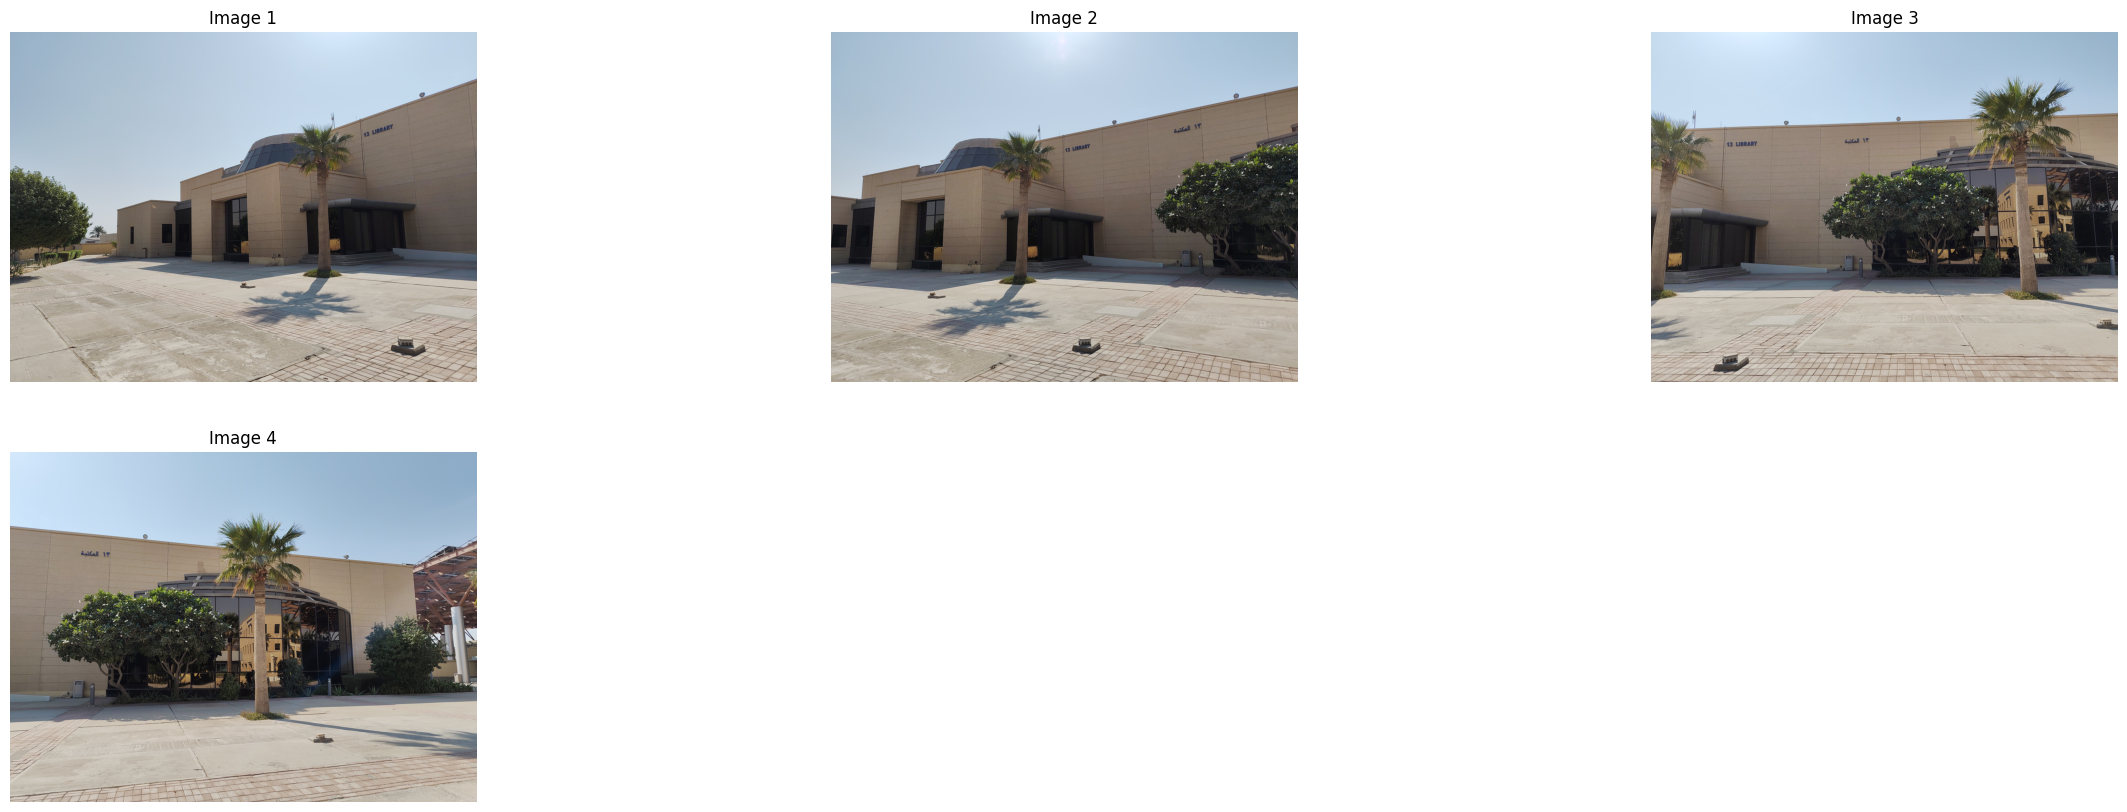

In [ ]:
# setting up the figure size for display
plt.figure(figsize=[30, 10])

# calculating grid size
num_colm = 3
# using ceiling to ensure we have enough rows even if the number isn't perfectly divisible
num_rows = math.ceil(num_images/num_colm)

# looping through images and plotting them
for i in range(0, num_images):
  plt.subplot(num_rows, num_colm, i+1)
  plt.axis('off') # hiding axis numbers for slicker look
  plt.imshow(images[i])
  plt.title(f"Image {i+1}")

plt.show()

**Perform Image Stitching**

Initialising the stitcher class to handle feature detection and homography (warping the images to fit together)

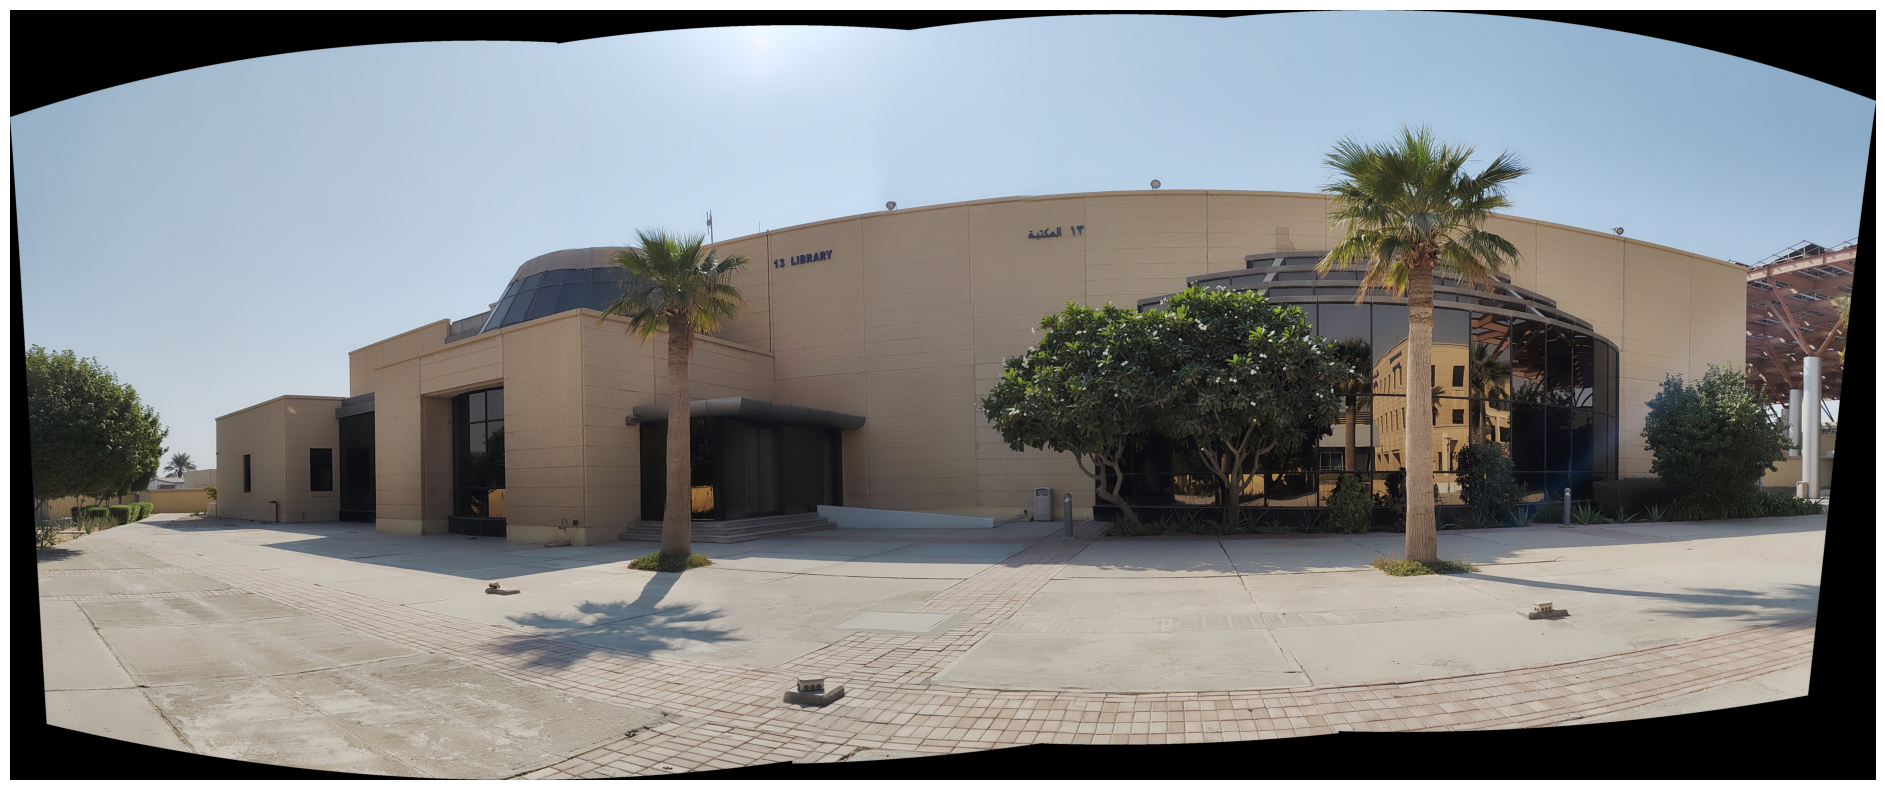

In [ ]:
# the create() function will automatically select the best mode (panorama)
stitch_images = cv2.Stitcher_create()
status, result = stitch_images.stitch(images)

# attempt to stitch the images together
# returns status -> code indicating success (0) or specific error type
# returns result -> the final stitched image array
if status == 0:
  plt.figure(figsize=[30, 10])
  plt.axis('off')
  plt.imshow(result)
else:
  print(f"Stitching failed! Error code: ", status)
  print("Possible reasons: Not enough keypoints, disjointed images, or lighting differences")

**Saving the Stitched Panorama Image to drive**

Since we converted the images to RGB for matplotlib, the resulting image is also in RGB. But openCV's save function expects images to be in BGR format.

Therefore, we'll have to convert it back, or the saved image will have weird, inverted colours

In [ ]:
# defining output file path
output_path = "/content/drive/MyDrive/Colab Notebooks/images/stitched_panorama.jpg"

# checking if the stitching was successful before trying to save it
if status == cv2.Stitcher_OK:
  # converting from RGB back to BGR for openCV saving (the colours will look inverted otherwise)
  result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

  # save the image
  success = cv2.imwrite(output_path, result_bgr)

  if success:
    print(f"Saved image to {output_path}")
  else:
    print("Failed to save image. Check your path permissions.")

else:
  print("Stitching failed, so nothing was saved.")

Saved image to /content/drive/MyDrive/Colab Notebooks/images/stitched_panorama.jpg
